In [31]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [78]:
TRAIN_PATH = "./data/train/"
imgnames = [filename for filename in os.listdir(TRAIN_PATH)]
imgpath = {img_name : os.path.join(TRAIN_PATH, img_name, "images", img_name+".png") for img_name in imgnames}

In [80]:
imgpath

{'d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5': './data/train/d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5/images/d4d88391bc399a3715440d4da9f8b7a973e010dc1edd9551df2e5a538685add5.png',
 'b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229': './data/train/b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229/images/b1e3aeb0c56261c17eb71c747d116057b8da7e8c8a6845bdc01b2b3ee2299229.png',
 '8b12e18670e4b24d03567d1e17c0c24fadf0ea2c1e763983dd6bb4c44b7376a6': './data/train/8b12e18670e4b24d03567d1e17c0c24fadf0ea2c1e763983dd6bb4c44b7376a6/images/8b12e18670e4b24d03567d1e17c0c24fadf0ea2c1e763983dd6bb4c44b7376a6.png',
 '4dbbb275960ab9e4ec2c66c8d3000f7c70c8dce5112df591b95db84e25efa6e9': './data/train/4dbbb275960ab9e4ec2c66c8d3000f7c70c8dce5112df591b95db84e25efa6e9/images/4dbbb275960ab9e4ec2c66c8d3000f7c70c8dce5112df591b95db84e25efa6e9.png',
 '54cb3328e778d87f76062b0550e3bc190f46384acd8efbe58c297265d1906e84': './data/train/54cb3328e778d

In [179]:
csv_path = "./data/stage1_train_labels.csv"
df = pd.read_csv(csv_path)
df

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3
...,...,...
29456,ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...,31317 2 31676 5 32035 6 32394 7 32753 8 33112 ...
29457,ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...,110318 4 110675 13 111034 19 111391 23 111750 ...
29458,ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...,24841 1 25201 2 25561 2 25921 3 26281 4 26641 ...
29459,ff599c7301daa1f783924ac8cbe3ce7b42878f15a39c2d...,4061 8 4417 14 4775 21 5134 23 5494 24 5853 26...


In [172]:
new_df = df.groupby(['ImageId'])['EncodedPixels'].apply(list).reset_index()

In [173]:
def rle_to_pixels(str_rle):
    str_rle = " ".join(str_rle)
    pixels = []
    result = [int(value) for value in str_rle.split(" ")]
    result_list = np.array(result).reshape(-1,2).tolist()
    for start, end in result_list:
        pixels.extend(list(range(start, start+end)))
    return pixels

In [174]:
new_df["list_pixels"] = new_df.EncodedPixels.map(rle_to_pixels)

In [175]:
len(new_df.list_pixels[0])

5715

In [176]:
def rle_to_maksk(filepath, encoding_pixels):
    img = cv2.imread(filepath)
    width, height, channel = img.shape
    mask = np.zeros((width,height)).flatten()
    mask[encoding_pixels] = 255
    return np.stack( (mask.reshape(width,height),) * 3, axis=-1) 

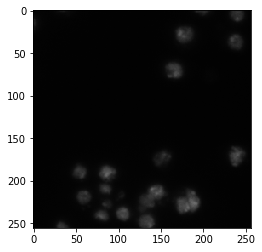

In [178]:
img = cv2.imread(imgpath[new_df.iloc[0,0]])
plt.imshow(img, interpolation='nearest')
plt.show()

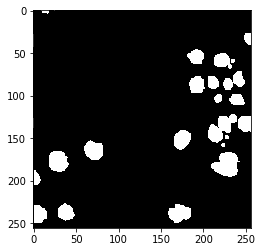

In [185]:
mask_rgb = rle_to_maksk(imgpath[new_df.iloc[0,0]], new_df.iloc[0,2])
plt.imshow(mask_rgb, interpolation='nearest')
plt.show()

In [193]:
new_df[["ImageId", "list_pixels"]].set_index("ImageId").head().to_dict()

{'list_pixels': {'00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552': [6908,
   7161,
   7162,
   7163,
   7164,
   7165,
   7166,
   7167,
   7168,
   7417,
   7418,
   7419,
   7420,
   7421,
   7422,
   7423,
   7424,
   7672,
   7673,
   7674,
   7675,
   7676,
   7677,
   7678,
   7679,
   7680,
   7928,
   7929,
   7930,
   7931,
   7932,
   7933,
   7934,
   7935,
   7936,
   8184,
   8185,
   8186,
   8187,
   8188,
   8189,
   8190,
   8191,
   8192,
   8440,
   8441,
   8442,
   8443,
   8444,
   8445,
   8446,
   8447,
   8448,
   8696,
   8697,
   8698,
   8699,
   8700,
   8701,
   8702,
   8703,
   8704,
   8952,
   8953,
   8954,
   8955,
   8956,
   8957,
   8958,
   8959,
   8960,
   9209,
   9210,
   9211,
   9212,
   9213,
   9214,
   9215,
   9216,
   9465,
   9466,
   9467,
   9468,
   9469,
   9470,
   9471,
   9472,
   9722,
   9723,
   9724,
   9725,
   9726,
   9727,
   9728,
   9978,
   9979,
   9980,
   9981,
   9982,
   9983,
   9984,
   10235